## Исследование данных о российском кинопрокате



**Цель исследования:** Нужно изучить рынок российского кинопроката и выявить текущие тренды. Обратить внимание на фильмы, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.

### Шаг 1. Импорт библиотек и загрузка данных 

In [1]:
import pandas as pd #импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    movies = pd.read_csv('mkrf_movies.csv')  #загружаем данные из файла в переменную movies и shows
    shows = pd.read_csv('mkrf_shows.csv')
except:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
shows.head() #первые пять значений датасета shows

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
shows.info() #получение сведений о датафрейме shows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
movies.info() #получение сведений о датафрейме movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [7]:
shows['puNumber'] = shows['puNumber'].astype('str') #приведение столбца puNumber к строковому типу данных
movies = movies.merge(shows, on = 'puNumber', how = 'outer') #объединение датафреймов по столбцу puNumber
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [8]:
movies.tail() #последние пять строк датафрейма

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


In [9]:
movies.sample(5) #случайные пять строк датафрейма

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2718,Про Петра и Павла,111004315,2015-04-14T12:00:00.000Z,Художественный,"ООО ""Студия ГРИНСИТИ""",Россия,Ю.Попович,"А.Сафронов, О.Степанцова, В.Щербин",«6+» - для детей старше 6 лет,0.0,37000000.0,52860000.0,Министерство культуры,6.1,драма,241620.0
6272,Кулаков великого предела,112009218,2018-10-09T12:00:00.000Z,Документальный,"ООО ""Студия Грин Фильм""",Россия,В.Непевный,Е.Григорьев,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3645,МУЛЬТ в кино. Выпуск № 53,114001217,2017-05-04T12:00:00.000Z,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,3.9,"мультфильм,детский",NaN
6013,Смысл жизни,111011018,2018-08-01T12:00:00.000Z,Художественный,"ООО ""Студия Д.Куповых""",Россия,"Э.Бордуков, Г.Дульян, М.Тумова, Э.Жолнин, В.Ку...","А.Ермолин, Д.Куповых, Р.Хайрулин, Г.Дульян, М....",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"мюзикл,комедия",NaN
4317,Семейка Джонсов,121015210,2010-08-11T12:00:00.000Z,Художественный,"Эхо Лэйк Продакшнз, Зе Джонсез, Премьер Пикчерз",США,Деррик Борте,"Адам Беттеридж, Деррик Борте",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама,комедия",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

In [10]:
movies.info() #получение сведений о датафрейме movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


In [11]:
movies.isna().sum() #количество пропущенных значений 

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [12]:
list_columns = ['production_country', 'ratings'] 

for i in list_columns: #цикл для вывода уникальных значений в столбцах из списка list_columns
    print(i)
    print(sorted(movies[~movies[i].isna()][i].unique()))
    print()

production_country
[' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия', 'Австралия - Великобритания - Бельгия - Индия', 'Австралия - Германия', 'Австралия - Ирландия', 'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада', 'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия', 'Австралия-США', 'Австралия-Турция-США', 'Австрия', 'Австрия - Германия', 'Австрия - Германия - Франция', 'Австрия - Люксембург', 'Австрия, Великобритания, Германия', 'Австрия-Германия-Франция', 'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия', 'Аргентина - Испания', 'Аргентина - Испания - Уругвай', 'Аргентина - Мексика - Бразилия - Франция - США', 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды', 'Аргентина - Франция - Испания', 'Аргентина, Испания', 'Аргентина-Испания', 'Армения', 'Армения - Германия', 'Армения - Казахстан', 'Армения-Россия', 'Бельгия', 'Бельгия - Германия - Люксембург', 'Бельгия - Германия - Люксембург - Франция'

In [13]:
movies[movies['production_country'] == '2019'] #смотрю количество значений '2019' в столбце production_country

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19T12:00:00.000Z,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


In [14]:
movies['production_country'] = movies['production_country'].replace('2019', 'Германия') 
#заменяю значение '2019' на 'Германия' в столбце production_country
sorted(movies[~movies['production_country'].isna()]['production_country'].unique()) 
#уникальные значения столбца production_country

[' СССР',
 ' СССР ',
 ' СССР   ',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - Люксембур

In [15]:
for i in movies['ratings'].unique(): #цикл, который отбирает уникальные значения в процентах из столбца ratings
    #и заменяет число с процентом на число о 1 до 10
    if (type(i) == type(' ')) and ('%' in i):
        new_rate = i.replace('%', '')
        new_rate = float(new_rate) /10
        movies['ratings'] = movies['ratings'].replace( i, new_rate)
        #percent_list.append(i)
        

movies['ratings'].unique() #выводим уникальные значения в столбце ratings

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

In [16]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
#тип данных в стобце show_start_date на datetime
movies['ratings'] = movies['ratings'].astype('float') #меняем тип данных в столбце ratings на float
movies.isna().mean()*100 #

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
box_office               57.814587
dtype: float64

In [17]:
movies.info() #проверяю изменения в типах данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), object(10)
memory usage: 994.2+ KB


**Вывод:**

- Для приведения столбца ratings к типу float необходимо избавится от значений, которые нельзя будет перевести из строкового типа данных к типу float. В моем случае это значения с процентами, которые я с помощью цикла поместила в списоки заменила их на число от 1 до 10, убрав из строки процент и поделив полученное число на 10.

- Привела столбец show_start_date к типу datetime.

- Так же нетипичное значение было обнаружено в столбце production_country. В одной строке страна производства была равно 2019. Так как это только одна строка, то я решила заменить это значение на верное.

#### Шаг 2.2. Заполнение пропусков в датафрейме

In [18]:
movies.isna().sum() #смотрю количество пропусков по каждому столбцу

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [19]:
movies = movies.dropna(subset = ['director']) #удаляю строки с пропусками в столбце director
movies['director'].isna().sum() #проверяю столбец director на пропуски

0

In [20]:
movies[movies['production_country'].isna()] #фильмы с неизвестной ситраной производства

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0


In [21]:
movies['production_country'] = movies['production_country'].fillna('СССР') #заполняю страну производства
    
movies.isna().sum() #проверяю уменьшилось ли количество пропусков

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                17
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7145
nonrefundable_support    7145
budget                   7145
financing_source         7145
ratings                   961
genres                    970
box_office               4320
dtype: int64

**Вывод:** 

- В стобце film_studio всего 17 пропусков, так как этот столбец для исследования нам не особо нужен и важен, то я решила оставить пропуски.

- В столбце director было 9 пропусков. Так как этот столбец важен для исследования и я с ним буду работать на следующих шагах, то я удалила строки с пропусками в этом столбце.

- После удаления пропусков в стобце director остался один пропуск, я решила заполнить его.

- В столбцах refundable_support, nonrefundable_support, budget и financing_source одинаковое количество пропусков. Думаю это связано с тем, что данные в столбце бюджет указаны, только для тех фильмов, которые получили гос. поддержку, в то время как столбцы refundable_support и nonrefundable_support это количество возвратных и невозвратных средств от гос. поддержки. Пропуски в этих столбцах я решила не заполнять.

- В столбцах producer, ratings, genres так же есть пропуски, но я не вижу хорошего метода для заполнения пропусков в таких столбцах, поэтому пропуски в этих столбцах не заполняла.

#### Шаг 2.3. Проверка на дубликаты в датафрейме

In [22]:
movies.duplicated().sum() #сумма дубликатов по всему датафрейму

0

In [23]:
movies['title'].duplicated().sum() #сумма дубликатов по столбцу title

714

In [24]:
movies[movies['title'].duplicated()].head() #первые пять строк из дубликатов по столбцу title

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


In [25]:
filtered_movies = movies.drop('puNumber', axis = 1) #создаю новый датафрейм такой же как movies, но без столбца puNumber
filtered_movies.head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [26]:
filtered_movies.duplicated().sum() #количество дубликатов в новом датафрейме

5

In [27]:
movies = movies.drop(filtered_movies[filtered_movies.duplicated()].index) 
#удаляю дубликаты, которые нашла в отфилтрованном датафрейме, из датафрейма movies

**Вывод:** При поиске дубликатов, методом duplicated, по всему датафрейму их не было обнаружено. Но при поиске дубликатов по столбцу title, можно понять что у нас много фильмов с одинаковым названием, но другая информация о таких фильмах может отличаться (например дата выхода фильма в прокат). Но есть вариант, когда совпадать может не только название, но и вся остальная информация, кроме стобца puNumber. Поэтому я создала отфильтрованный датафрейм без столбца puNumber, и в отфильтрованном датафрейме было найдено пять дубликатов. Из датафрейма movies такие дубликаты были удалены методом drop, куда были переданы индексы дубликатов.

#### Шаг 2.4. Проверка столбцов с категориальными значениями.

In [28]:
category_column = ['type', 'age_restriction', 'production_country', 'film_studio', 'genres', 'director', 'producer']

for i in category_column: 
    #цикл для удаления пробелов в начале и в конце строки, выводит количество уникальных символов в столбце до удаления пробелов
    #и после
    print(i)
    print('Количество уникальных значений до удаления пробелов:', movies[i].nunique())
    movies[i] = movies[i].str.strip()
    print('Количество уникальных значений после удаления пробелов:', movies[i].nunique())
    print()

type
Количество уникальных значений до удаления пробелов: 8
Количество уникальных значений после удаления пробелов: 6

age_restriction
Количество уникальных значений до удаления пробелов: 5
Количество уникальных значений после удаления пробелов: 5

production_country
Количество уникальных значений до удаления пробелов: 949
Количество уникальных значений после удаления пробелов: 933

film_studio
Количество уникальных значений до удаления пробелов: 5485
Количество уникальных значений после удаления пробелов: 5457

genres
Количество уникальных значений до удаления пробелов: 742
Количество уникальных значений после удаления пробелов: 742

director
Количество уникальных значений до удаления пробелов: 4811
Количество уникальных значений после удаления пробелов: 4801

producer
Количество уникальных значений до удаления пробелов: 5344
Количество уникальных значений после удаления пробелов: 5329



In [29]:
movies['production_country'].unique() #уникальные значения столбца production_country

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [30]:
movies['production_country'] = movies['production_country'].replace(' -', ',', regex = True)
#замена тире на запятую в столбце production_country
movies['production_country'] = movies['production_country'].replace('-', ', ', regex = True)
movies['production_country'].nunique() #количество уникальных значений в столбце production_country

817

In [31]:
movies['production_country'].unique() #уникальные значения в столбце production_country

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

**Вывод:** 
- Во всех категориальных столбцах были удалены пробелы в начале и конце строки, за счет этого сократилось количество уникальных значений в столбцах.

- В столбце production_country уникальные значения были приведены к единому виду заменой тире между значениями стран на запятые. Это также сократило количество уникальных значений в столбце production_country.

#### Шаг 2.5. Проверка столбцов с количественными значениями

In [32]:
movies.query('nonrefundable_support + refundable_support > budget')['title'].count()
#проверяю есть ли столбцы в которых сумма возвратной части долга и невозвратной больше, чем сам бюджет

17

In [33]:
def bool_type(row):
    """Функция, которая проверяет не меньше ли сумма невозвратного долга и возвратного, чем бюджет.
        Если меньше возвращает сумму невозвратного и возвратного долга"""
    
    if row['nonrefundable_support'] + row['refundable_support'] > row['budget']:
        return row['nonrefundable_support'] + row['refundable_support']
    
    return row['budget']

movies['budget'] = movies.apply(bool_type, axis = 1) #применяю функцию к столбцу бюджет

movies.query('nonrefundable_support + refundable_support > budget')['title'].count()
#проверяю есть ли столбцы в которых сумма возвратной части долга и невозвратной больше, чем сам бюджет

0

**Вывод:** В описании данных сказано, что столшбец budget включает в себя полный объем гос. поддержки, а значит ситуация когда сумма возвратной части поддержки и невозвратной больше, чем сам бюджет, невозможна. Поэтому с помощью функции заменила в столбце budget на сумму возвратной и невозвратнйо части гос. поддержки, но только при условии что эта сумма больше, чем значение в столбце budget.

#### Шаг 2.6. Создание новых столбцов с информацией о годе проката, с главным режисером, основным жанром фильма и с долей государственного бюджета.

In [34]:
movies['year'] = movies['show_start_date'].dt.year #добавляю столбец с годом премьеры фильма
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


In [35]:
def get_first_value(string, sep):
    """Функция для получения первого значения из столбца со строковыми типами данных"""
    
    if type(string) != type(np.nan): #если тип данных не float, то применяем к строке метод split и возвращаем первое значение 
        val_list = string.split(sep = sep) #из разделенной строки
        return val_list[0]
    
    return np.nan #если тип данных float, то возвращаем Nan

In [36]:
movies['head_director'] = movies['director'].apply( get_first_value, args = ',') #применяем функцию к столбцу director
movies['main_genre'] = movies['genres'].apply( get_first_value, args = ',') #применяем функцию к столбцу genres
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,head_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [37]:
def budget_share(row):
    """Функция для расчета доли гос. поддержки от общего бюджета фильма"""
    
    if row['budget'] > 0:
        return (row['nonrefundable_support'] + row['refundable_support']) / row['budget'] 
    
    return 0

movies['share_budget'] = movies.apply(budget_share, axis = 1) #применяем функцию к датафрейму
movies[movies['share_budget'] != 0].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,head_director,main_genre,share_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764


**Вывод:** В датасет movies были добавлены столбцы year, head_director, main_genre и share_budget:
- year - год премьеры фильма.
- head_director - имя главного режиссера.
- main_genre - наименование основного жанра фильма.
- share_budget - доля суммы невозвратной части и возвратной от общего бюджета.

### Шаг 3. Исследовательский анализ данных

In [38]:
pvt_box_office = movies.pivot_table(index = 'year', values = ['title', 'box_office'] , aggfunc = 'count')
#составляю сводную таблиц с количеством фильмов, для которых извесно был ли прокат в кинотеатре 
#и общим количеством фильмов
pvt_box_office.columns = ['box_office_count', 'total_count']
#переименовываю наименование колонок
pvt_box_office['ratio'] = round(pvt_box_office['box_office_count'] / pvt_box_office['total_count'] * 100, 2)
#добавляю столбец с долей фильмов, у которых был прокат в кинотеатре к общему количеству фильмов
pvt_box_office

,box_office_count,total_count,ratio
year,,,
2010,105,979,10.73
2011,109,620,17.58
2012,127,592,21.45
2013,184,628,29.30
2014,279,806,34.62
2015,465,705,65.96
2016,526,818,64.30
2017,357,505,70.69
2018,475,889,53.43


In [39]:
pvt_sum = movies.pivot_table(index = 'year', 
                             values = ['box_office'] , 
                             aggfunc = 'sum')
#сводная таблица с сумой сборов в кинотеатре за каждый год
pvt_sum.style.format('{:.1f}', subset = 'box_office') #убираю экспоненту при выводе на экран

,box_office
year,
2010,2428654.0
2011,14102765.0
2012,6911073.0
2013,29799706.2
2014,7444951859.2
2015,39497365196.4
2016,47866299741.9
2017,48563707217.5
2018,49668403134.3


In [40]:
pvt_box_office = movies.pivot_table(index = 'year',
                                   values = 'box_office', 
                                   aggfunc = ['mean','median'])
#сводная таблица с средним и медианным значением сборов за каждый год

pvt_box_office.style.format('{:.1f}', subset =['mean','median']) #убираю экспоненту при выводе на экран

,mean,median
,box_office,box_office
year,,
2010,23130.0,1700.0
2011,129383.2,3000.0
2012,54417.9,5560.0
2013,161954.9,3522.5
2014,26684415.3,18160.0
2015,84940570.3,4920933.0
2016,91000569.9,3846679.4
2017,136032793.3,9968340.0


In [41]:
def pvt_plot(pvt, figsize, grid, title, xlabel, ylabel):
    """Функция для построения графиков"""
    pvt.plot(figsize = figsize, grid = grid) 
    plt.title(title) #наименование графика
    plt.xlabel(xlabel) #наименование оси x
    plt.ylabel(ylabel) #наименование оси y
    plt.show()

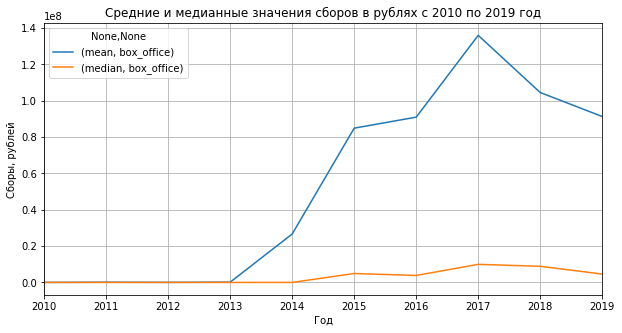

In [42]:
pvt_plot(pvt_box_office, (10, 5), True, 'Средние и медианные значения сборов в рублях с 2010 по 2019 год',
        'Год', 'Сборы, рублей') #строю график, используя функцию pvt_plot

In [43]:
year = [2015, 2016, 2017, 2018, 2019]

pvt_age = movies.query('year in @year').pivot_table(index = 'year', 
                                          columns = 'age_restriction',  
                                          values = 'box_office',
                                          aggfunc = 'sum')
#сводная таблица о количестве сборов в зависимости от возрастного ограничения по годам

pvt_age.columns = ['0+', '12+', '16+', '18+', '6+'] #переименовываю столбцы
pvt_age.style.format('{:.1f}', subset = ['0+','12+','16+','18+', '6+']) #избавляюсь от экспоненты в числах

,0+,12+,16+,18+,6+
year,,,,,
2015,379054578.4,13616082008.9,11368120870.3,5432308367.4,8701799371.4
2016,150228848.7,12204446524.4,16664548541.7,6793929818.9,12053146008.2
2017,229598930.0,7851427660.7,18745042900.1,9651495581.0,12086142145.8
2018,32449002.1,14267291660.7,16503602347.0,8760085501.1,10104974623.4
2019,17746066.8,12680198773.7,12753418984.6,10121796303.6,12852548650.9


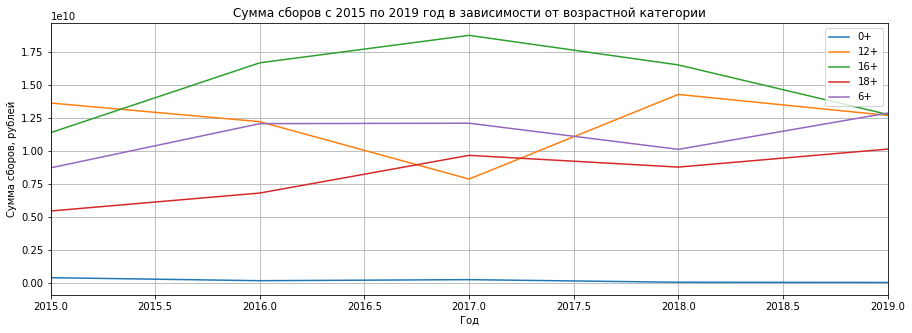

In [44]:
pvt_plot(pvt_age, (15, 5), True, 'Сумма сборов с 2015 по 2019 год в зависимости от возрастной категории',
        'Год', 'Сумма сборов, рублей') #строю график, используя функцию pvt_plot

In [45]:
pvt_age_budget = movies.query('year in @year and budget > 0').pivot_table(index = 'year', 
                                                              columns = 'age_restriction',  
                                                              values = 'box_office',
                                                              aggfunc = 'sum')

#сводная таблица о количестве сборов в зависимости от возрастного ограничения по годам для фильмов с гос. поддержкой

pvt_age_budget.columns = ['0+', '12+', '16+', '18+', '6+'] #переименовываю столбцы
pvt_age_budget.style.format('{:.1f}', subset = ['0+','12+','16+','18+', '6+']) #избавляюсь от экспоненты в числах

,0+,12+,16+,18+,6+
year,,,,,
2015,61040.0,2201135951.5,1544961755.0,55065093.6,1984061578.0
2016,658870.0,2817273268.9,1257426526.7,1099917.5,2005249256.0
2017,206478186.0,4027989670.2,1045648979.0,120109783.0,5464848682.8
2018,nan,5883937243.8,2193975129.3,94650107.4,1761506529.8
2019,0.0,4559753941.0,1603183457.2,199590037.5,2047100019.0


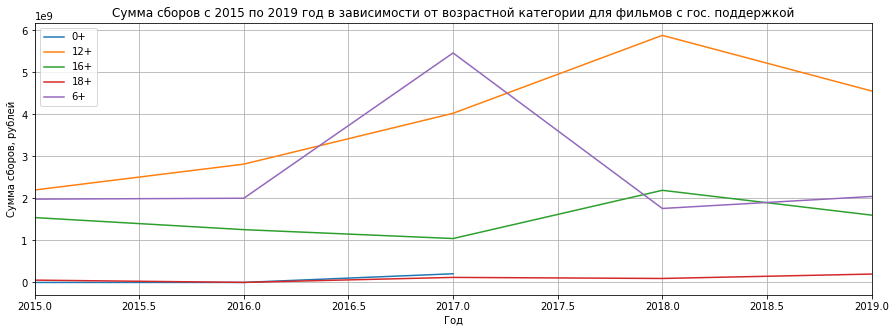

In [46]:
pvt_plot(pvt_age_budget, (15, 5), True, 
         'Сумма сборов с 2015 по 2019 год в зависимости от возрастной категории для фильмов с гос. поддержкой',
        'Год', 'Сумма сборов, рублей') #строю график, используя функцию pvt_plot

**Вывод:**
- С 2010 по 2017 год доля фильмов, которые были в прокате в кинотеатрах росла. Но 2018 и 2019 году стала ниже, но все равно была больше 50%.

- В 2018 году сумма сборов была максимальной за все время 49 мллиардов рублей, а самая минимальная сумма сборов была в 2010 году - 2 миллиона рублей.

- С каждым годом средняя и медианная сумма сборов за год растет. Большой скачек произошел в 2015 году и 2017 году.

- Средние значения сборов по годам выше, чем медианные. Но с 2013 года разница между срежним и медианным значением сильно увеличилась. Это может быть связано с большим разбросом между максимальной и минимальной суммой сборов за год. То есть начиная с 2013 начали появляться фильмы с значительно большей суммой сборов, чем у остальных фильмов в этом году.

- В период с 2015 по 2019 год лидером по сумме сборов были фильмы в возрастной категории 16+. Самые низкие сборы у фильмов с рейтингом 0+, думаю это связано с тем, что такие фильмы мало интересны взрослым, взрослые люди на такие фильмы ходят в основном со своими маленькими детьми и то когда у родителей есть своюодное время, сам по себе без родителя ребенок на такой сеанс не попадет. В то время как на фильм категории 16+ могут ходить люди сильно старше 16 или даже младше, у подростков чаще всего больше свободного времени и они самостоятельно могут посетить фильм.

- Для фильмов с гос. поддержкой сумма сборов для фильмов с категорией 12+ увнличивалась и с 2018 по 2019 год была выше, чем у фильмов с другими возрастными категориями. В 2017 году больше всего было сборов у фильмов с категорией 6+. 

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

In [47]:
pvt_bx_budget = movies.query('budget > 0').pivot_table(index = 'year', 
                                       values = ['budget', 'box_office'], 
                                       aggfunc = 'median')
#медианная сумма сборов и бюджета для фильмов с гос. поддержкой
pvt_bx_budget

,box_office,budget
year,,
2013,10161192.55,127717695.0
2014,5504517.85,61036441.5
2015,9200824.50,57493985.5
2016,17921115.61,69883049.0
2017,50451949.00,78096315.0
2018,27023390.31,90324563.5
2019,25977291.30,78388683.0


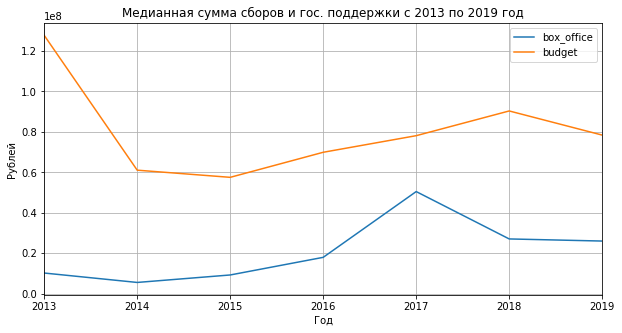

In [48]:
pvt_bx_budget.plot(figsize = (10, 5), grid = True)
plt.title('Медианная сумма сборов и гос. поддержки с 2013 по 2019 год')
plt.xlabel('Год')
plt.ylabel('Рублей')
plt.show()
#строю график по медианной сумме сборов и бюджету фильмов с гос. поддержкой

In [49]:
pvt_bx_budget['division'] = pvt_bx_budget['budget'] / pvt_bx_budget['box_office']
#добавила столбец, который показывает во сколько раз медианная сумма сборов меньше медианой суммы бюджета фильма, по годам
pvt_bx_budget 

,box_office,budget,division
year,,,
2013,10161192.55,127717695.0,12.569164
2014,5504517.85,61036441.5,11.088426
2015,9200824.50,57493985.5,6.248786
2016,17921115.61,69883049.0,3.899481
2017,50451949.00,78096315.0,1.547935
2018,27023390.31,90324563.5,3.342459
2019,25977291.30,78388683.0,3.017585


In [50]:
pvt_budget = movies.pivot_table(index = 'year',                                 
                   values = ['budget', 'title'],
                   aggfunc = 'count')
#сводная таблица с количеством фильмов, которые получили гос. поддержку и общим количеством фильмов, а также долей фильмов,
#получивших гос. поддержку
pvt_budget.columns = ['budget_count', 'total_count'] #изменяю наименования столбцов
pvt_budget['share'] = pvt_budget['budget_count'] / pvt_budget['total_count'] *100 
#добавляю столбец с долей фильмов, получивших гос. поддержку, от общего количества фильмов
pvt_budget

,budget_count,total_count,share
year,,,
2010,0,979,0.000000
2011,0,620,0.000000
2012,0,592,0.000000
2013,2,628,0.318471
2014,16,806,1.985112
2015,86,705,12.198582
2016,61,818,7.457213
2017,41,505,8.118812
2018,56,889,6.299213


In [51]:
movies.pivot_table(index = 'year', values = 'budget', aggfunc = 'sum') 
#сводная таблица по сумме идущую на гос. поддержку каждый год

,budget
year,
2010,0.000000e+00
2011,0.000000e+00
2012,0.000000e+00
2013,2.554354e+08
2014,1.302485e+09
2015,7.738669e+09
2016,7.554943e+09
2017,7.057173e+09
2018,7.000664e+09


In [52]:
pvt_budget_rating = movies.query('budget > 0').pivot_table(index = 'year',
                                                           values = ['ratings', 'box_office'],
                                                           aggfunc = ['mean', 'median'])
#сводная таблица по средним и медианным рейтингам и сборам фильмов с гос. поддержкой
pvt_budget_rating.columns = ['mean_box_office', 'mean_ratings', 'median_box_office', 'median_ratings']
#меняю название колонок
pvt_budget_rating

,mean_box_office,mean_ratings,median_box_office,median_ratings
year,,,,
2013,1.016119e+07,6.700000,10161192.55,6.7
2014,6.358889e+07,6.006667,5504517.85,6.4
2015,6.806218e+07,6.139759,9200824.50,6.2
2016,1.013618e+08,5.677193,17921115.61,5.8
2017,2.785917e+08,6.000000,50451949.00,6.2
2018,1.773941e+08,6.001887,27023390.31,6.2
2019,1.401605e+08,6.176119,25977291.30,6.2


In [53]:
pvt_rating = movies[movies['budget'].isna()].pivot_table(index = 'year',
                                                           values = ['ratings', 'box_office'],
                                                           aggfunc = ['mean', 'median'])
#сводная таблица для среднего и медианного количества рейтинго и сборов для всех фильмов без гос. поддержки
pvt_rating.columns = ['mean_box_office', 'mean_ratings', 'median_box_office', 'median_ratings']
#меняю название колонок
pvt_rating

,mean_box_office,mean_ratings,median_box_office,median_ratings
year,,,,
2010,2.313004e+04,6.729373,1700.0,6.9
2011,1.293832e+05,6.530435,3000.0,6.7
2012,5.441790e+04,6.545155,5560.0,6.7
2013,5.207319e+04,6.511897,3475.0,6.6
2014,2.443928e+07,6.535773,16210.0,6.7
2015,8.871600e+07,6.357778,4796668.3,6.5
2016,8.966651e+07,6.424127,3597517.7,6.6
2017,1.185492e+08,6.344836,9487367.0,6.4
2018,9.483135e+07,6.433223,8292672.0,6.5


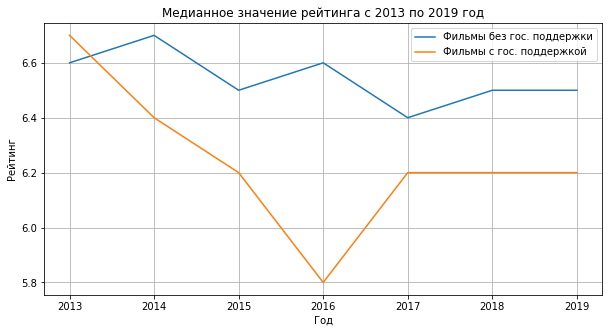

In [54]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(pvt_rating[pvt_rating.index >= 2013]['median_ratings'], label = 'Фильмы без гос. поддержки')
ax.plot(pvt_budget_rating['median_ratings'], label = 'Фильмы с гос. поддержкой')
ax.legend()
ax.set_title('Медианное значение рейтинга с 2013 по 2019 год')
ax.set_xlabel('Год')
ax.set_ylabel('Рейтинг')
plt.show()
#построение графика для сравнения медианного значения рейтинга у фильмов без гос. поддержки и фильмами с гос. поддержкой

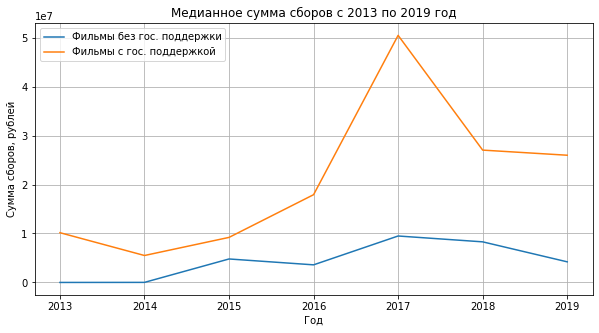

In [55]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(pvt_rating[pvt_rating.index >= 2013]['median_box_office'], label = 'Фильмы без гос. поддержки')
ax.plot(pvt_budget_rating['median_box_office'], label = 'Фильмы с гос. поддержкой')
ax.set_title('Медианное сумма сборов с 2013 по 2019 год')
ax.set_xlabel('Год')
ax.set_ylabel('Сумма сборов, рублей')
ax.legend()
plt.show()
#построение графика для сравнения медианной суммы сборов у фильмов без гос. поддержки и фильмами с гос. поддержкой

In [56]:
pvt_country = movies.pivot_table(index = 'production_country',
                   values = 'budget',
                   aggfunc = 'count')
#сводная таблица по количеству фильмов у разных стран
pvt_country.query('budget != 0') #отбираем те, у которых гос. поддержка не равна нулю

,budget
production_country,
Россия,316
"Россия, Армения",1
"Россия, Бельгия, Финляндия",1
"Россия, Германия",2
"Россия, Германия, Великобритания",1
"Россия, Германия, Казахстан, Польша, Китай",1
"Россия, Грузия",1
"Россия, Италия",2
"Россия, Китай",1


In [57]:
pvt_genre = movies.pivot_table(index = 'main_genre',
                   values = ['box_office', 'ratings', 'budget'],
                   aggfunc = ['mean', 'median'])
#сводная таблица по медианному и среднему значению сборов и рейтингов по жанру за все время
pvt_genre.columns = ['mean_box_office', 'mean_budget', 'mean_ratings',
                     'median_box_office', 'median_budget', 'median_ratings']
pvt_genre

,mean_box_office,mean_budget,mean_ratings,median_box_office,median_budget,median_ratings
main_genre,,,,,,
аниме,4.130023e+07,NaN,7.477027,2.238131e+06,NaN,7.60
биография,9.057708e+07,1.763112e+08,7.012121,9.319952e+06,131000000.0,6.90
боевик,1.169435e+08,1.139061e+08,6.508914,1.081914e+07,115000000.0,6.70
вестерн,8.035216e+07,NaN,7.300000,1.825289e+06,NaN,7.90
военный,7.545350e+07,1.428785e+08,6.726087,7.400330e+06,109814241.0,6.65
детектив,1.168495e+08,2.396445e+08,6.646429,1.440789e+07,130000000.0,6.65
детский,2.169321e+05,4.597450e+07,6.114286,2.756900e+04,46940248.0,7.20
для взрослых,7.742100e+05,NaN,4.466667,7.742100e+05,NaN,4.10
документальный,2.351044e+06,NaN,7.237900,8.125810e+05,NaN,7.30


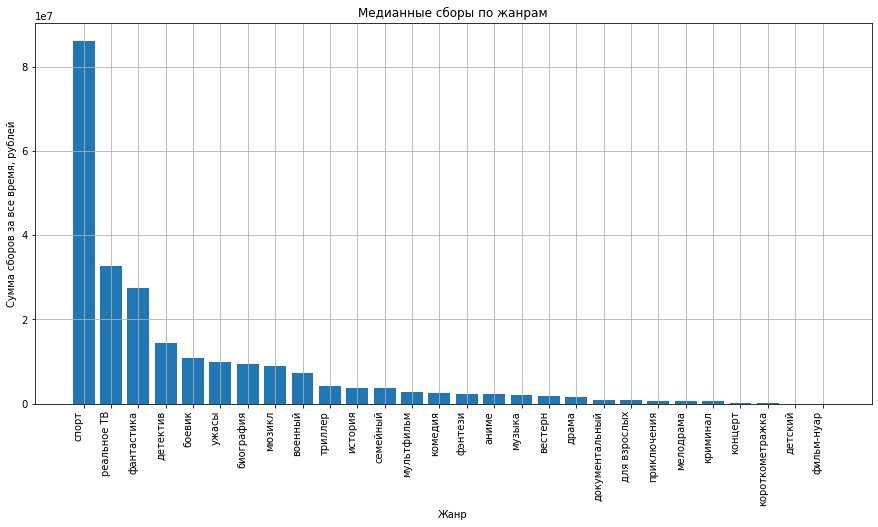

In [58]:
sorted_pvt_genre = pvt_genre.sort_values(by = 'median_box_office', ascending = False)
plt.figure(figsize = (15, 7))
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.title('Медианные сборы по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма сборов за все время, рублей')
plt.bar(sorted_pvt_genre.index, sorted_pvt_genre['median_box_office'].values)
plt.show()
#строю стобчатую диаграмму с медианными сборами по жанрам

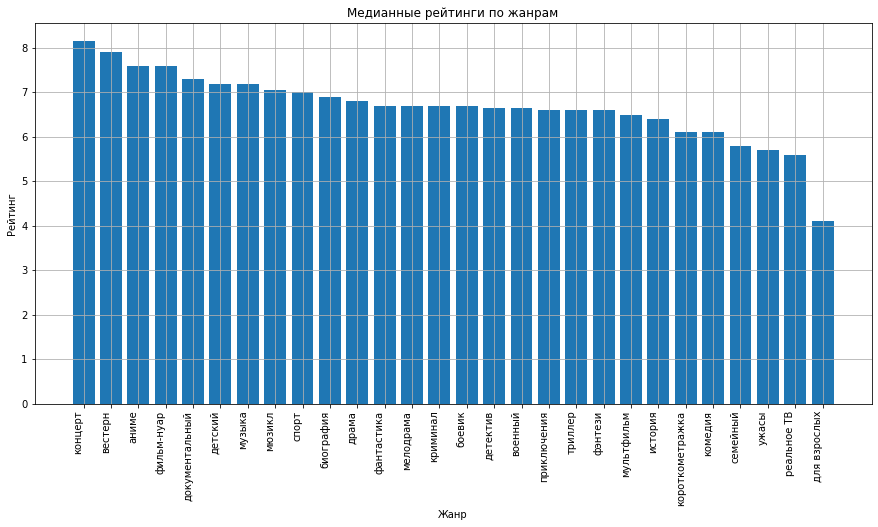

In [59]:
sorted_pvt_genre = pvt_genre.sort_values(by = 'median_ratings', ascending = False)
plt.figure(figsize = (15, 7))
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.title('Медианные рейтинги по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.bar(sorted_pvt_genre.index, sorted_pvt_genre['median_ratings'].values)
plt.show()
#строю стобчатую диаграмму с медианными рейтингами по жанрам

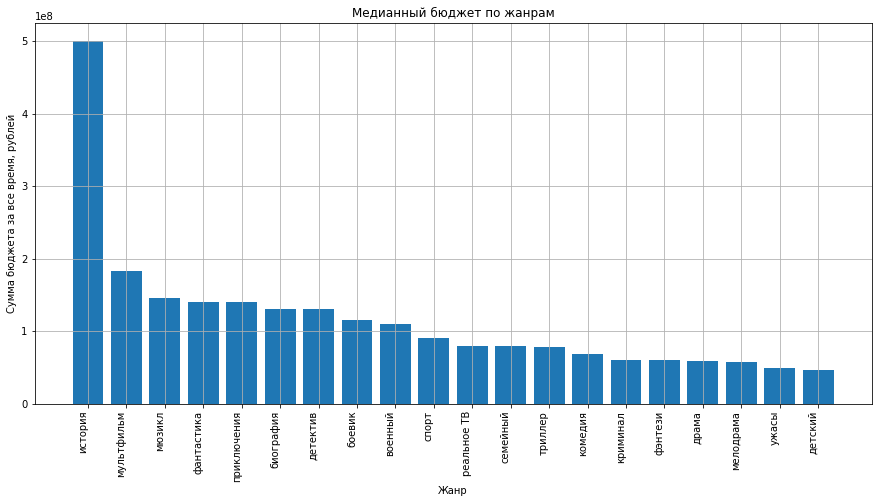

In [60]:
sorted_pvt_genre = pvt_genre.query('median_budget > 0').sort_values(by = 'median_budget', ascending = False)
plt.figure(figsize = (15, 7))
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.title('Медианный бюджет по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма бюджета за все время, рублей')
plt.bar(sorted_pvt_genre.index, sorted_pvt_genre['median_budget'].values)
plt.show()
#строю стобчатую диаграмму с медианным бюджетом по жанрам

**Вывод:**

- По графику "Медианная сумма сборов и гос. поддержки с 2013 по 2019 год" видно, что у фильмов, получивших гос. поддержку бюджет выше, чем сборы в кинотеатрах. В 2013 году медианное значение бюджета фильмов с гос. поддержкой в 12 раз больше, чем медианное значение сборов фильмов в кнотеатре (но в 2013 году, было всего два фильма получивших гос. поддержку, стоит это учесть). В 2017 год разрыв между бюджетом и сборами минимальный - бюджет фильмов всего в 1,5 раза больше, чем сборы в кинотеатрах.

- Больше всего было выпушенно фильмов с гос. поддержкой в 2015 году - 12% от общего числа фильмов. Больше всего денег было выделенно на поддержку фильмов в 2019 году около 1,2 миллиарда рублей.

- Начиная с 2013 и по 2016 год рейтинг фильмов с гос. поддержкой снижался. У фильмов без гос. поддержки так же видна тенденция на снижение рейтинга. По всем годам у фильмов без гос. поддержки рейтинг выше, чем у фильмов с гос. поддержкой, кроме 2013. Самый низкий рейтинг у фильмов с гос. поддержкой был в 2016 году - 5.8, самый высокий в 2013 году - 6.7. Самый низкий рейтинг у фильмов без гос. поддержки был в 2017 году - 6.4, самый высокий в 2014 году - 6.7

- При том, что рейтинг фильмов с гос. поддержкой ниже, сборый у таких фильмов выше по всем годам. Начиная с 2013 года и по 2017 год сумма сборов резко увеличивается, но после 2017 года резко падает. У фильмов без гос. поддеожки сумма сборов с 2013 по 2017 год тоже увеличивается, но не такими большими темпами, в отличии от фильмов с гос. поддержкой. После 2017 года также идет небольшой спад в сумме сборов.

- Страна, котрая оказала гос. поддержку самому большому количеству фильмов - Россия, она поддержала 314 фильмов. Остальые страны, которые оказывали гос. поддержку это Россия, но в партнерстве с другими странами.

- Топ-3 жанра по сборам это: спорт, реальное ТВ и фантастика. Меньше всего получили жанры - короткометражка, детский, фильм-нуар. То что у жанра короткометражка одни из самых низких сборов можно объяснить тем, что фильмы такого жанра не так часто выходят в прокат в кинотеатрах.

- Топ-3 жанра по рейтингу: концерт, вестерн и аниме. Самый низкий рейтин у жанров: для взрослых, реальное ТВ, ужасы. У жанров с меньшим количеством сборов оказались довольно высокие рейтинги, так у жанров - фильм-нуар, концерт и детский довольно высокие рейтинги.

- В среднем большего всего бюджет у фильмов жанра - история, мультфильм, мюзикл. Меньше всего у фильмов жанра - детский, ужасы, мелодрама.

### Шаг 5. Общий вывод

Целью исследования было изучить фильмы с гос. поддержкой и текущие тренды Российского кинопроката:

- У фильмов с гос. поддержкой бюджет выше, чем сборы в кинотеатрах. У фильмов с гос. поддержкой рейтинги ниже, чем у фильм без гос. поддержки. Но если сравнивать сборы в кинотеатрах у фильмов с гос. поддержко и без гос. поддержки, то у первых они выше.

- Гос. поддержку фильмам оказывала в основном Росссия.

- Большие бюджеты у фильмов жанра - история, мультфильм и мюзикл.

Из этого можно сделать вывод, что фильмы с гос. поддержкой имеют хорошие сборы по сравнению с остальными, но они не покрывают бюджет потраченный на производство фильмов. И рейтинги у фильмов ниже с гос. поддержкой ниже, чем у фильмов без нее.

Тренды кинопроката:

- Жанры, которые лидируют по сборам имеют довольно низкие рейтинги. А жанры у котрых маленькие сборы входят в шестерку фильмов с самыми высокими рейтингами.

- Лидируют по сумме сборов фильмы с рейтингом 16+, самая низкая сумма сборов у фильмов с рейтингами 0+.

- С каждым годом средняя и медианная сумма сборов за год растет. Большой скачек произошел в 2015 году и 2017 году.

- Среди фильмов, получивших гос. поддержку, возрастные категории с наибольшим количеством сборов - 12+ и 6+. В 2017 большая сумма сборов пришлась на фильмы категории 6+, для фильмов с гос. поддержкой, и в этом же году произошел скачек в повышени рейтинга таких фильмов и суммы сборов.


